# Problem Statement:
- Goal is to create a model which will be able to predict all positive class as positive only.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Machine-Learning/main/Logistic%20Regression/Client.csv',
                index_col=0)
df

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,1,0.0,1.0,0.0,50.0,34.940
1,3,0,1.0,0.0,0.0,18.0,0.891
2,66,0,0.0,1.0,0.0,5.0,0.330
3,70,1,0.0,1.0,1.0,31.0,0.037
4,96,0,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,0,0.0,1.0,0.0,NaN,0.576
1336,34110,1,1.0,1.0,0.0,46.0,3.705
1337,34113,0,1.0,1.0,0.0,39.0,0.099
1338,34145,1,1.0,0.0,0.0,8.0,3.177


In [3]:
df.drop(columns=['CASENUM'], inplace=True)

# EDA

In [4]:
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.511194,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,1.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [5]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [6]:
for i in df.isna().sum():
    print(f"Missing Values: {i/len(df)*100}")

Missing Values: 0.0
Missing Values: 0.8955223880597015
Missing Values: 3.0597014925373136
Missing Values: 3.582089552238806
Missing Values: 14.1044776119403
Missing Values: 0.0


# Missing Value imputation

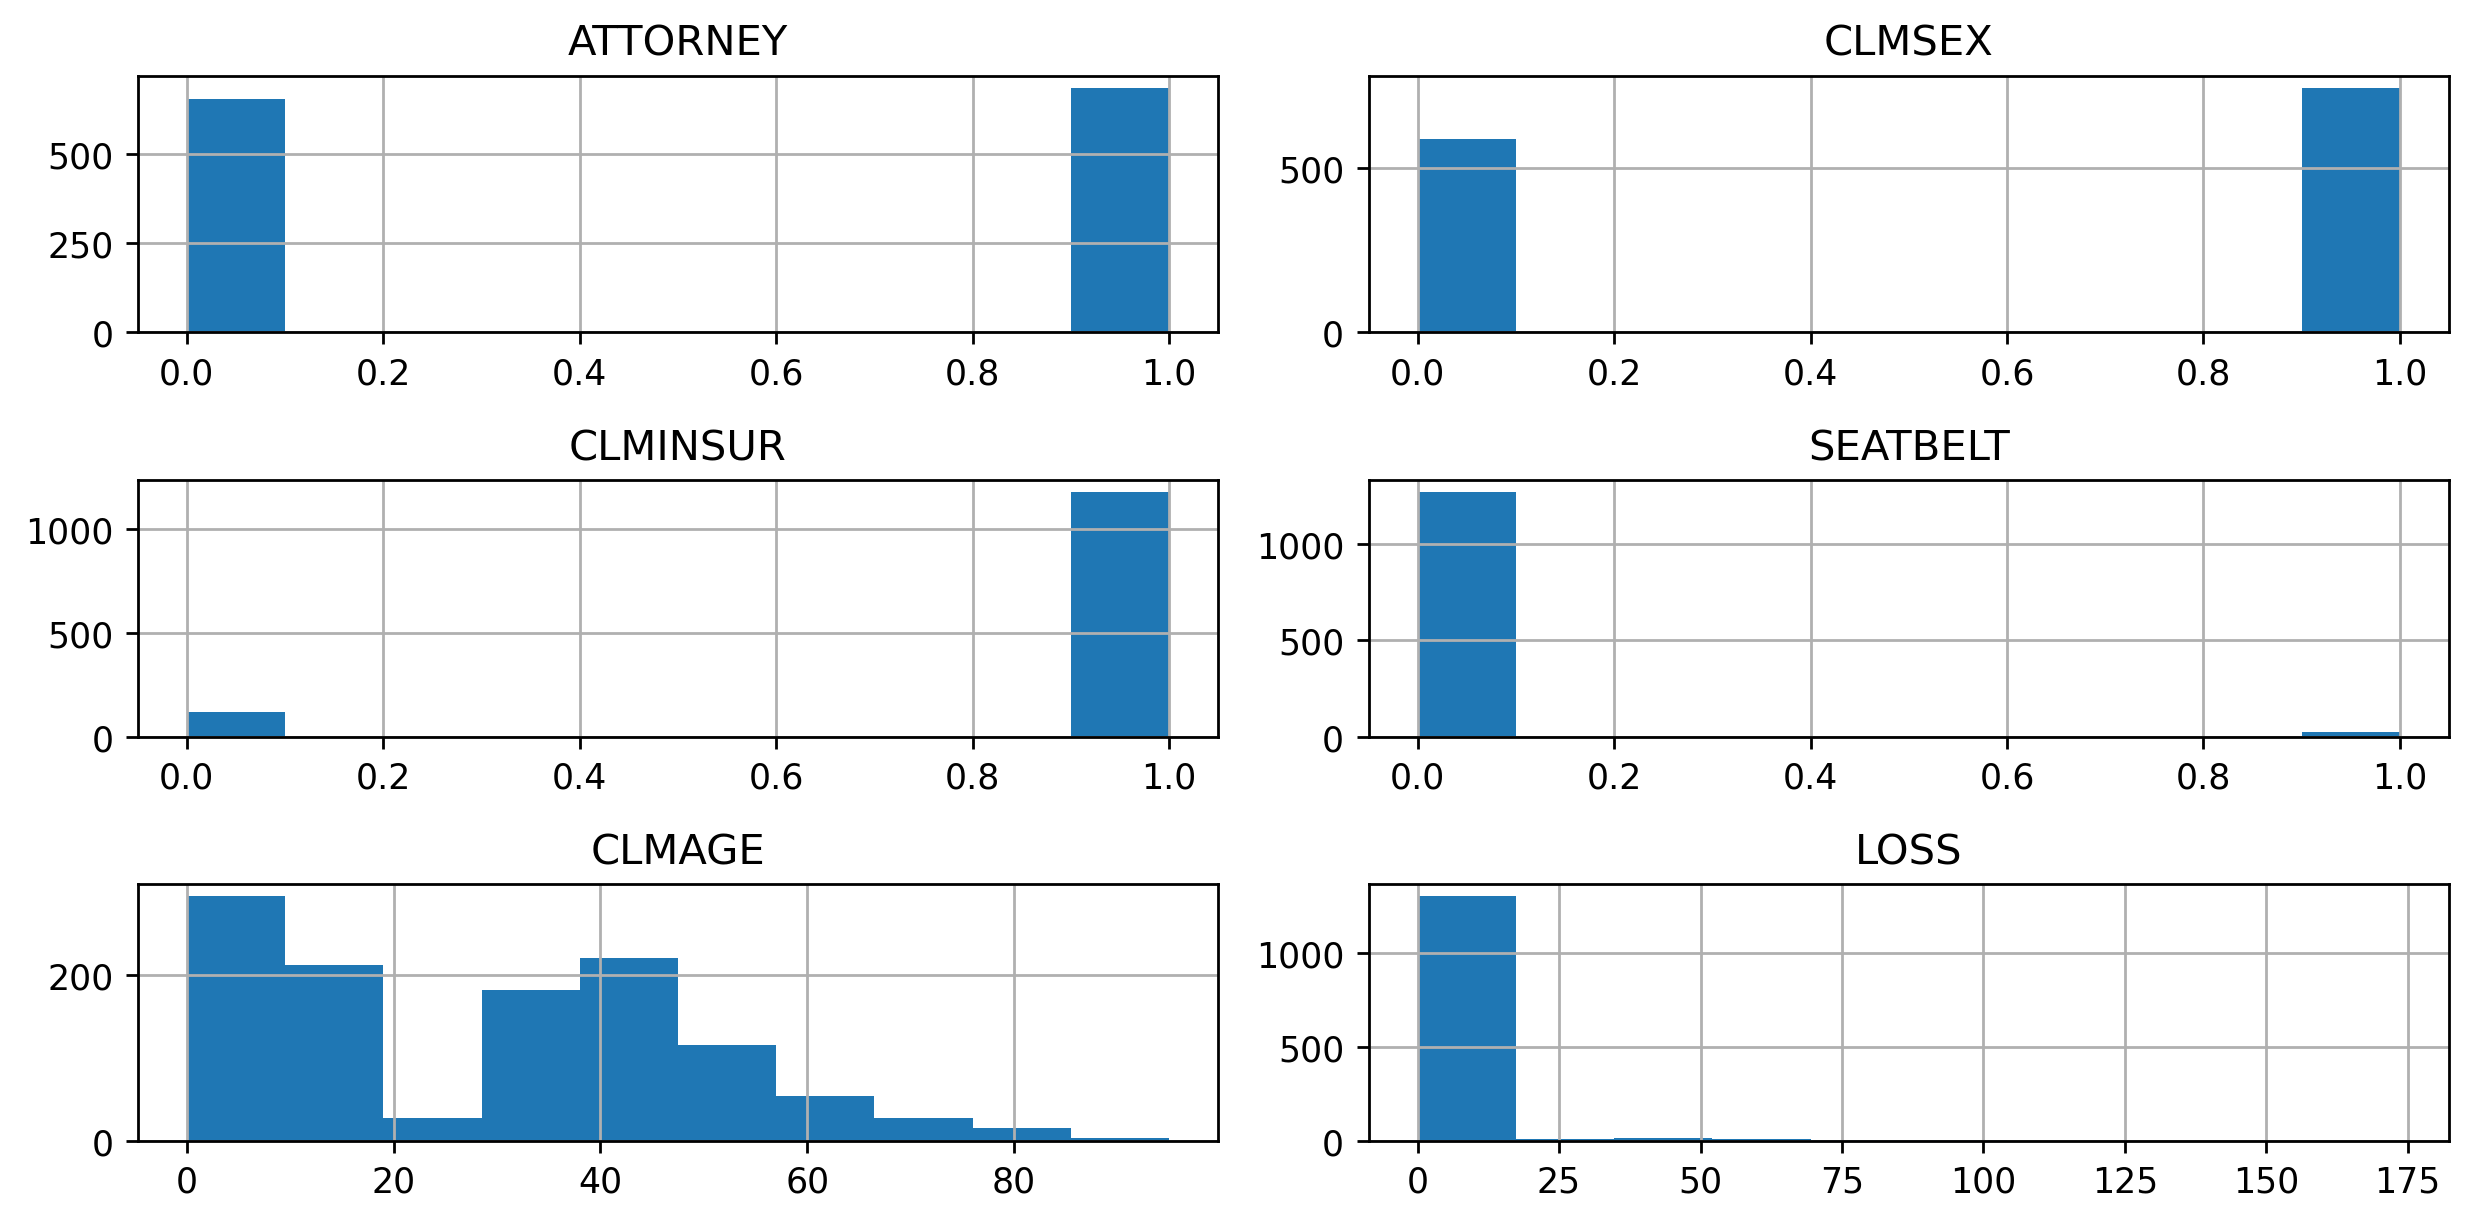

In [7]:
df.hist()
plt.tight_layout()

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
si = SimpleImputer(strategy='most_frequent')

In [10]:
df.loc[:,'CLMSEX':'SEATBELT'] = si.fit_transform(df.loc[:,'CLMSEX':'SEATBELT'])

In [11]:
df['CLMAGE'].fillna(df['CLMAGE'].median(), inplace=True)

In [12]:
df.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

# Splitting the data into training and testing set.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x =df.iloc[:,1:]
y = df['ATTORNEY']

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [16]:
xtrain

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1045,1.0,1.0,0.0,37.0,0.935
969,0.0,1.0,0.0,14.0,10.869
594,1.0,1.0,0.0,43.0,0.007
1081,1.0,1.0,0.0,77.0,1.000
1053,1.0,1.0,0.0,58.0,9.485
...,...,...,...,...,...
715,0.0,1.0,0.0,13.0,6.979
905,0.0,1.0,0.0,30.0,3.330
1096,0.0,1.0,0.0,50.0,3.095
235,1.0,1.0,0.0,17.0,1.619


In [17]:
ytrain

1045    0
969     1
594     0
1081    0
1053    1
       ..
715     0
905     0
1096    1
235     1
1061    0
Name: ATTORNEY, Length: 1005, dtype: int64

In [18]:
xtest

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
559,1.0,1.0,0.0,30.0,0.105
1089,1.0,1.0,0.0,39.0,0.450
1021,0.0,1.0,0.0,8.0,0.764
460,1.0,1.0,0.0,10.0,1.069
802,1.0,1.0,0.0,11.0,3.713
...,...,...,...,...,...
1194,1.0,1.0,0.0,7.0,0.599
628,1.0,1.0,0.0,48.0,0.058
1100,1.0,1.0,0.0,43.0,3.800
1227,0.0,1.0,0.0,30.0,0.161


In [19]:
ytest

559     0
1089    0
1021    0
460     0
802     1
       ..
1194    0
628     0
1100    1
1227    1
937     0
Name: ATTORNEY, Length: 335, dtype: int64

# Model Building

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lg = LogisticRegression()

In [22]:
#Train the model
lg.fit(xtrain,ytrain)

#Prediction
ypred = lg.predict(xtest)

In [23]:
print(xtest.shape)
print(ypred.shape)

(335, 5)
(335,)


In [24]:
ypred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

# Model Evaluation

In [25]:
#Actual values vs Predicted values
print(ytest[:25].values)
print(ypred[:25])

[0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0]
[0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0]


In [26]:
#Classification report

In [27]:
from sklearn.metrics import classification_report , confusion_matrix

In [28]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71       169
           1       0.71      0.57      0.64       166

    accuracy                           0.67       335
   macro avg       0.68      0.67      0.67       335
weighted avg       0.68      0.67      0.67       335



In [29]:
confusion_matrix(ytest,ypred)

array([[131,  38],
       [ 71,  95]], dtype=int64)

Text(240.30555555555557, 0.5, 'Predicted Values')

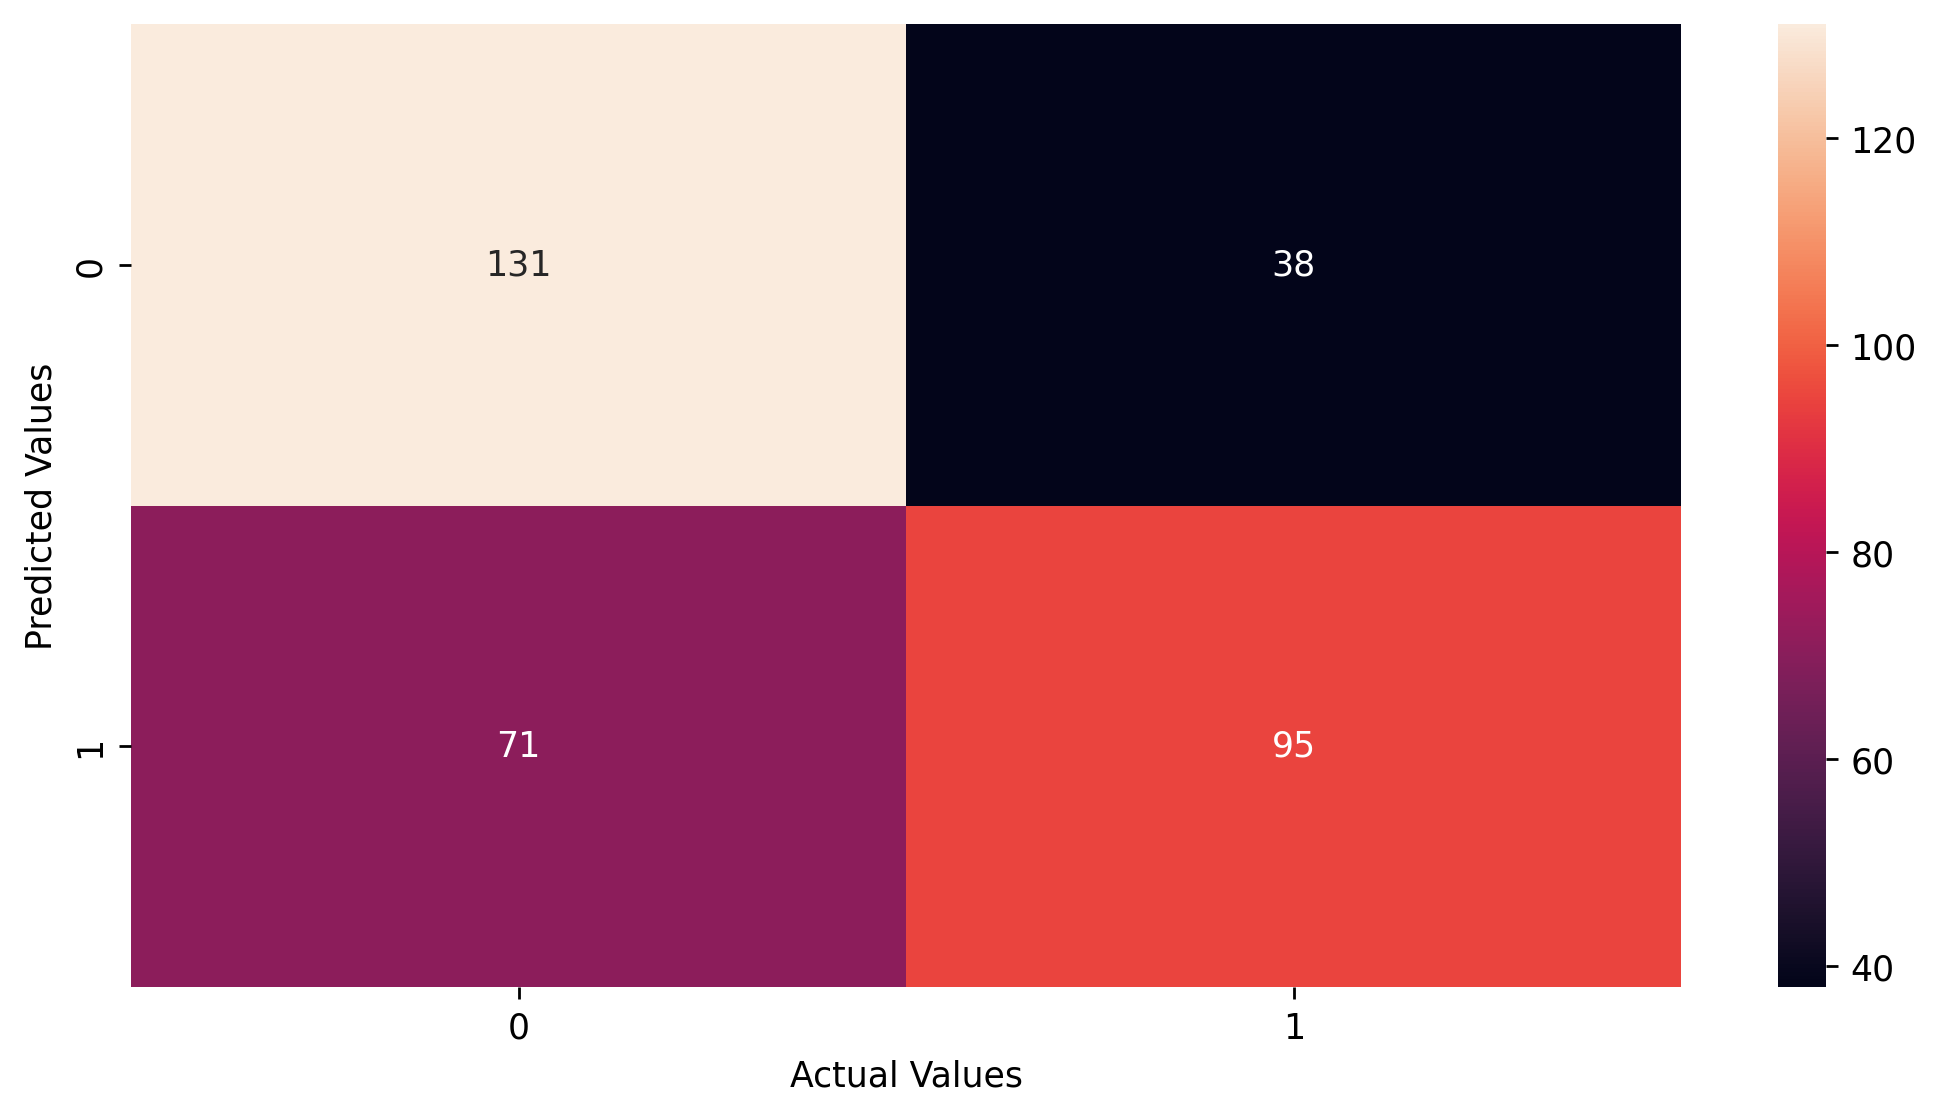

In [30]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True, fmt='0.3g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [31]:
proba = lg.predict_proba(xtest)[:,1]



-  Proba will give us two probabilities 0th class and 1st class 
-  What is the probability that this record is going to 1st class and what is the probability that this particular record is going to second class

In [53]:
proba

array([0.30323781, 0.31846486, 0.44484255, 0.3901692 , 0.59370228,
       0.36823781, 0.29888722, 0.54667107, 0.33706775, 0.33238427,
       0.44090977, 0.38813308, 0.3914463 , 0.59157154, 0.33545829,
       0.5731052 , 0.43341783, 0.45874373, 0.35550498, 0.33005752,
       0.31795131, 0.4083713 , 0.62389624, 0.41008005, 0.40016091,
       0.36342888, 0.29631884, 0.37630725, 0.400861  , 0.32067067,
       0.40847759, 0.36287272, 0.43854964, 0.73063368, 0.75157225,
       0.39185659, 0.64438525, 0.54355777, 0.3507862 , 0.31006104,
       0.32245154, 0.99987043, 0.49796237, 0.4704765 , 0.43495983,
       0.6006756 , 0.27600771, 0.32326512, 0.37555168, 0.41561345,
       0.426043  , 0.32113007, 0.31666494, 0.42155288, 0.45109274,
       0.370873  , 0.73561399, 0.3470899 , 0.82853879, 0.3458794 ,
       0.58021035, 0.63826416, 0.36823781, 0.91214555, 0.59669959,
       0.85775538, 0.34425773, 0.87709615, 0.53331762, 0.85152499,
       0.74682103, 0.65175585, 0.31869644, 0.41337124, 0.63697

# Threshold selection

In [54]:
from sklearn.metrics import roc_auc_score, roc_curve

In [55]:
fpr,tpr,threshold = roc_curve(ytest,proba)
auc = roc_auc_score(ytest,proba)

Text(0, 0.5, 'TPR(True Positive Ratio)')

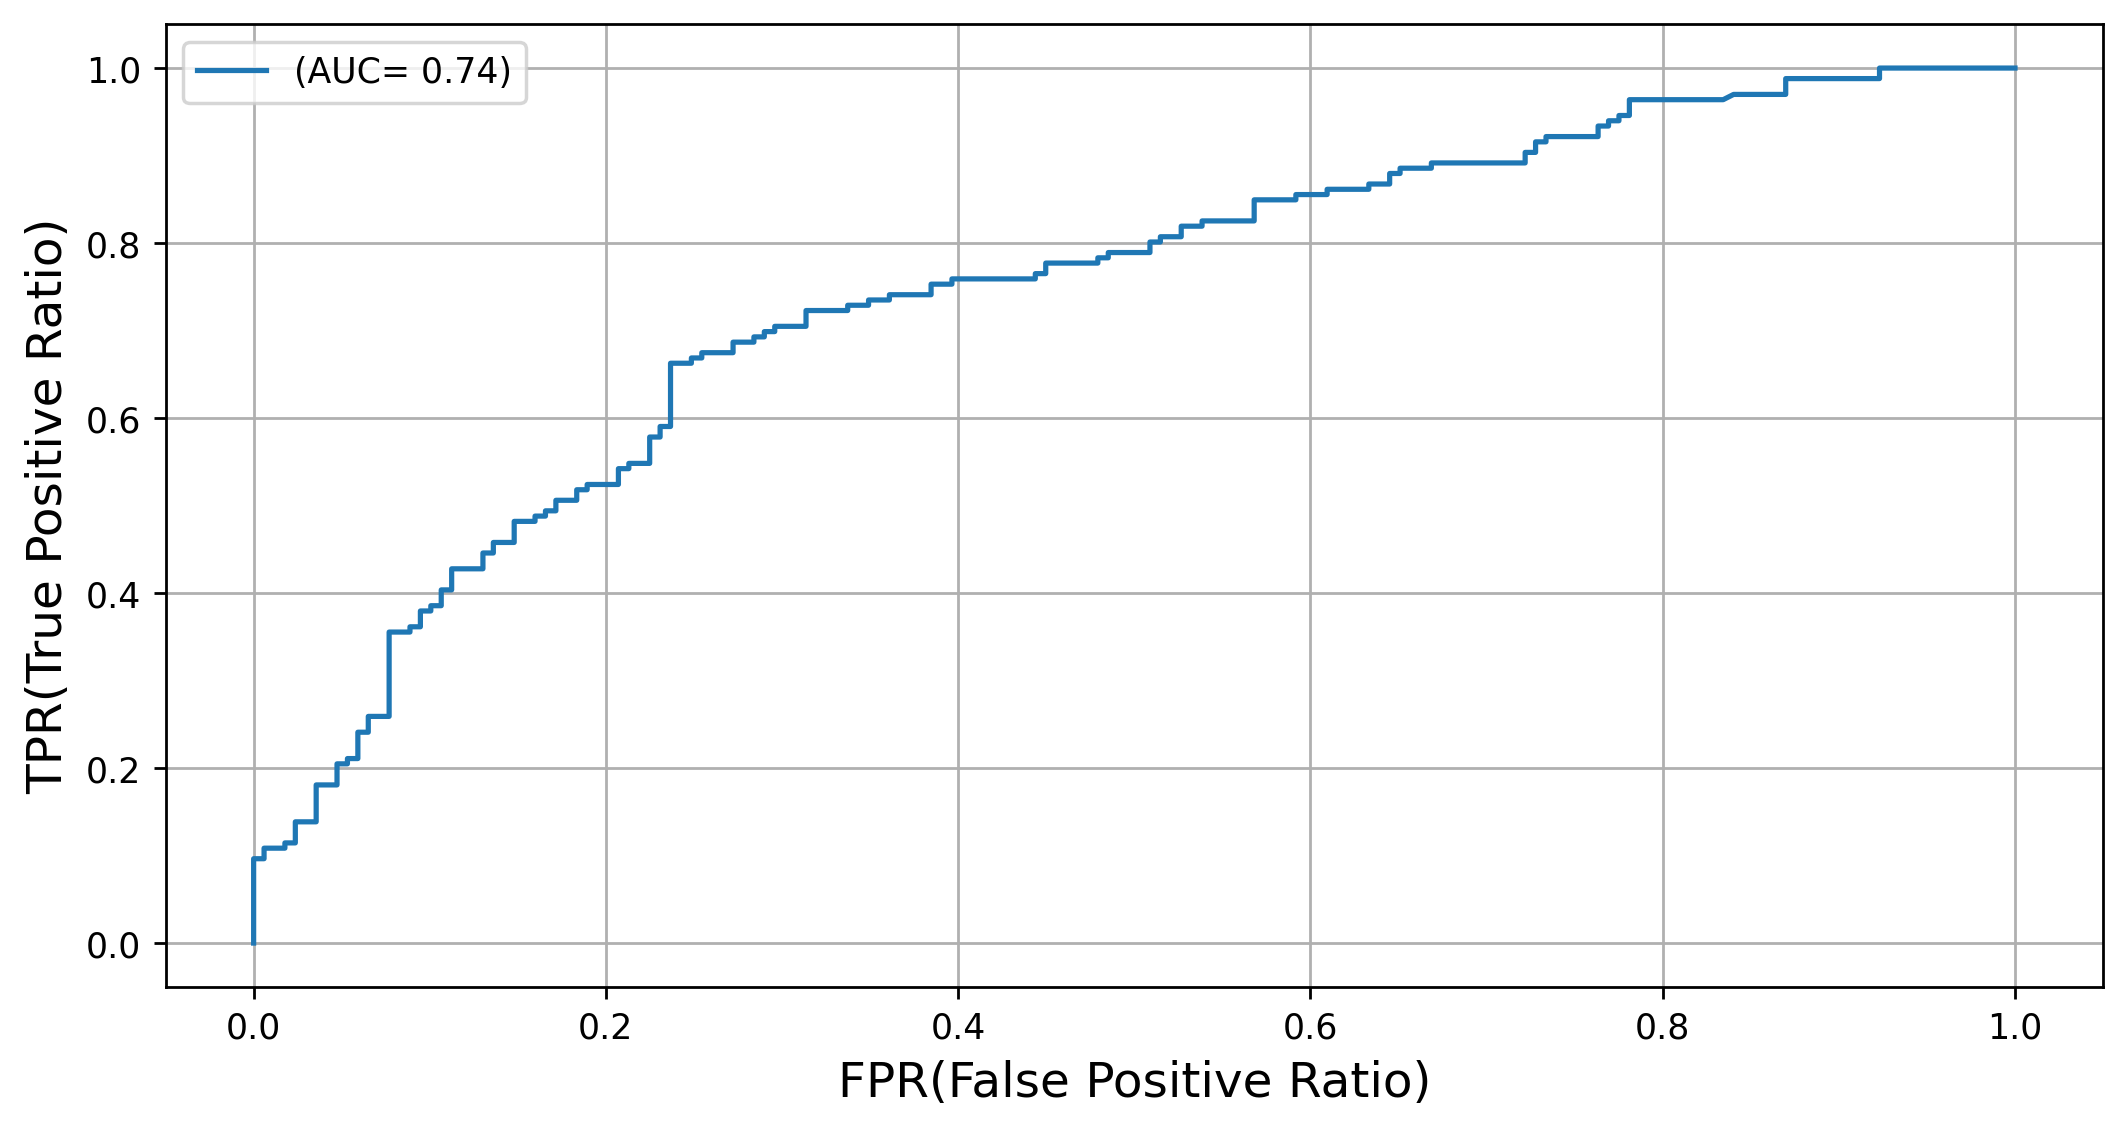

In [56]:
plt.plot(fpr,tpr, label = '(AUC= %0.2f)'%auc)
plt.grid()
plt.legend()

plt.xlabel('FPR(False Positive Ratio)', size = 14)
plt.ylabel('TPR(True Positive Ratio)', size =14)

- In above graph the actual threshold value is not clear

In [60]:
threshold

array([2.        , 1.        , 0.90701471, 0.90648842, 0.90117574,
       0.87709615, 0.85955148, 0.85775538, 0.8310217 , 0.81779368,
       0.76375363, 0.75557278, 0.75157225, 0.74682103, 0.74668385,
       0.74339897, 0.73063368, 0.71645362, 0.69579978, 0.69030255,
       0.64218311, 0.63697681, 0.63639799, 0.63573149, 0.62389624,
       0.62337616, 0.62032849, 0.61865595, 0.61328381, 0.60856374,
       0.59881529, 0.59470127, 0.59157154, 0.59056556, 0.58952849,
       0.58660638, 0.57433121, 0.5731052 , 0.57212609, 0.57113995,
       0.57000833, 0.5689856 , 0.56759661, 0.5589744 , 0.55504011,
       0.55102653, 0.54667107, 0.53947812, 0.53331762, 0.52928342,
       0.52618545, 0.51633061, 0.49873152, 0.49796237, 0.49374734,
       0.49192916, 0.44875109, 0.44254453, 0.44090977, 0.44067762,
       0.44063105, 0.43835111, 0.43495983, 0.43460929, 0.43341783,
       0.43295489, 0.43266659, 0.43114317, 0.42880684, 0.42554298,
       0.42489218, 0.42284412, 0.42155288, 0.42040753, 0.41853

In [61]:
len(threshold)

136

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
# Wherever the probability associated with +ve class is > than threshold value convert
# it in to 1st class otherwise 0 th class. 
    accuracy.append(accuracy_score(ytest,ypred))

In [64]:
accuracy

[0.5044776119402985,
 0.5044776119402985,
 0.5492537313432836,
 0.5522388059701493,
 0.5522388059701493,
 0.5522388059701493,
 0.5492537313432836,
 0.5522388059701493,
 0.5582089552238806,
 0.5582089552238806,
 0.573134328358209,
 0.573134328358209,
 0.5791044776119403,
 0.582089552238806,
 0.5791044776119403,
 0.582089552238806,
 0.591044776119403,
 0.5940298507462687,
 0.5970149253731343,
 0.5970149253731343,
 0.6388059701492538,
 0.6388059701492538,
 0.6358208955223881,
 0.6388059701492538,
 0.6417910447761194,
 0.6447761194029851,
 0.6417910447761194,
 0.6447761194029851,
 0.6477611940298508,
 0.6507462686567164,
 0.6567164179104478,
 0.6537313432835821,
 0.6567164179104478,
 0.6597014925373135,
 0.6597014925373135,
 0.6597014925373135,
 0.6656716417910448,
 0.6656716417910448,
 0.6626865671641791,
 0.6656716417910448,
 0.6626865671641791,
 0.6656716417910448,
 0.6656716417910448,
 0.6656716417910448,
 0.6656716417910448,
 0.6686567164179105,
 0.6656716417910448,
 0.662686567164179

In [65]:
thresh_sel = pd.DataFrame({
    'Threshold' : threshold,
    'Accuracy' :  accuracy
})

In [66]:
thresh_sel

,Threshold,Accuracy
0,2.000000,0.504478
1,1.000000,0.504478
2,0.907015,0.549254
3,0.906488,0.552239
4,0.901176,0.552239
...,...,...
131,0.299578,0.531343
132,0.298887,0.531343
133,0.298812,0.534328
134,0.296319,0.531343


In [67]:
thresh_sel.sort_values(by="Accuracy", ascending=False)

,Threshold,Accuracy
56,0.448751,0.710448
59,0.440678,0.710448
57,0.442545,0.710448
60,0.440631,0.707463
58,0.440910,0.707463
...,...,...
131,0.299578,0.531343
132,0.298887,0.531343
0,2.000000,0.504478
1,1.000000,0.504478


In [68]:
#Change the threshold value

In [69]:
from sklearn.preprocessing import binarize

In [70]:
ypred = binarize([proba], threshold=0.448751)[0]

In [71]:
ypred

array([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0.

In [72]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       169
           1       0.73      0.66      0.70       166

    accuracy                           0.71       335
   macro avg       0.72      0.71      0.71       335
weighted avg       0.72      0.71      0.71       335



In [73]:
from sklearn.metrics import recall_score